# Libraries

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

# Load from Database

In [2]:
server = '146.190.109.222,1434'
database = 'AdventureWorks2019'
username = 'auditor'
password = 'basangdata'

In [4]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

# Load SalesOrderHeader

In [25]:
query = 'SELECT * FROM Sales.SalesOrderHeader;'
df = pd.read_sql(query, cnxn)

C:\Users\aansubarkah\AppData\Local\Temp\ipykernel_27780\2325211448.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


In [12]:
df

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43659,PO522145787,10-4020-000676,...,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,None,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,43660,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43660,PO18850127500,10-4020-000117,...,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,None,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,43661,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43661,PO18473189620,10-4020-000442,...,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,None,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07
3,43662,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43662,PO18444174044,10-4020-000227,...,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,None,4A1ECFC0-CC3A-4740-B028-1C50BB48711C,2011-06-07
4,43663,8,2011-05-31,2011-06-12,2011-06-07,5,False,SO43663,PO18009186470,10-4020-000510,...,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,None,9B1E7A40-6AE0-4AD3-811C-A64951857C4B,2011-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31460,75119,8,2014-06-30,2014-07-12,2014-07-07,5,True,SO75119,None,10-4030-011981,...,6761.0,429826Vi35166,NaN,42.2800,3.3824,1.0570,46.7194,None,9382F1C9-383A-435F-9449-0EECEA21B78D,2014-07-07
31461,75120,8,2014-06-30,2014-07-12,2014-07-07,5,True,SO75120,None,10-4030-018749,...,8925.0,929849Vi46003,NaN,84.9600,6.7968,2.1240,93.8808,None,AE6A4FCF-FF73-4CD4-AF2C-5993D00D4AFE,2014-07-07
31462,75121,8,2014-06-30,2014-07-12,2014-07-07,5,True,SO75121,None,10-4030-015251,...,14220.0,529864Vi73738,NaN,74.9800,5.9984,1.8745,82.8529,None,D7395C0E-00CB-4BFA-A238-0D6A9F49884F,2014-07-07
31463,75122,8,2014-06-30,2014-07-12,2014-07-07,5,True,SO75122,None,10-4030-015868,...,18719.0,330022Vi97312,NaN,30.9700,2.4776,0.7743,34.2219,None,4221035A-4159-492F-AF40-4363A64FFC16,2014-07-07


C:\Users\aansubarkah\AppData\Local\Temp\ipykernel_27780\3315142192.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


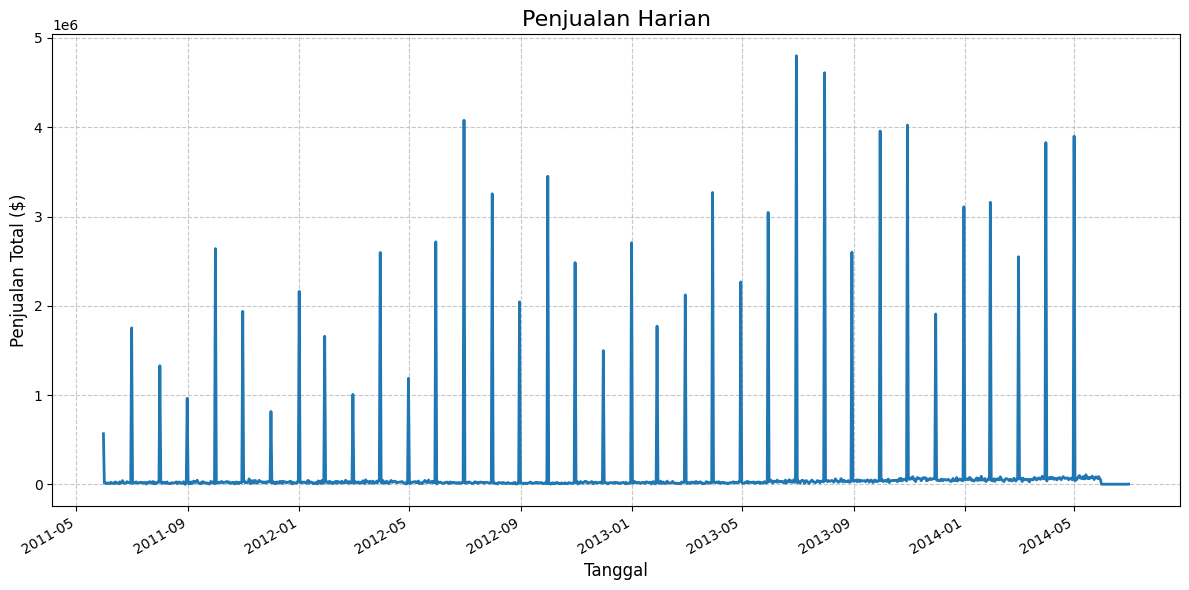

In [7]:
# Step 2: Query the database for sales data
query = """
SELECT 
  CAST(OrderDate AS DATE) AS OrderDate,
  SUM(TotalDue) AS TotalSales
FROM 
  Sales.SalesOrderHeader
GROUP BY 
  CAST(OrderDate AS DATE)
ORDER BY 
  OrderDate
"""

# Step 3: Read the data into a pandas DataFrame
df = pd.read_sql(query, cnxn)

# Step 4: Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Step 5: Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(df['OrderDate'], df['TotalSales'], linewidth=2)

# Step 6: Customize the chart
plt.title('Penjualan Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Penjualan Total ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use a tight layout
plt.tight_layout()

# Step 7: Save the chart
plt.savefig('adventureworks_sales_line_chart.png')

# Step 8: Display the chart
plt.show()

# Close the database connection
#cnxn.close()

In [15]:
df.iloc[:2,].T

,0,1
SalesOrderID,43659,43660
RevisionNumber,8,8
OrderDate,2011-05-31 00:00:00,2011-05-31 00:00:00
DueDate,2011-06-12 00:00:00,2011-06-12 00:00:00
ShipDate,2011-06-07 00:00:00,2011-06-07 00:00:00
Status,5,5
OnlineOrderFlag,False,False
SalesOrderNumber,SO43659,SO43660
PurchaseOrderNumber,PO522145787,PO18850127500
AccountNumber,10-4020-000676,10-4020-000117


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SalesOrderID            31465 non-null  int64         
 1   RevisionNumber          31465 non-null  int64         
 2   OrderDate               31465 non-null  datetime64[ns]
 3   DueDate                 31465 non-null  datetime64[ns]
 4   ShipDate                31465 non-null  datetime64[ns]
 5   Status                  31465 non-null  int64         
 6   OnlineOrderFlag         31465 non-null  bool          
 7   SalesOrderNumber        31465 non-null  object        
 8   PurchaseOrderNumber     3806 non-null   object        
 9   AccountNumber           31465 non-null  object        
 10  CustomerID              31465 non-null  int64         
 11  SalesPersonID           3806 non-null   float64       
 12  TerritoryID             31465 non-null  int64 

In [24]:
df.describe()

,SalesOrderID,RevisionNumber,DueDate,ShipDate,Status,CustomerID,SalesPersonID,TerritoryID,BillToAddressID,ShipToAddressID,ShipMethodID,CreditCardID,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,ModifiedDate
count,31465.000000,31465.000000,31465,31465,31465.0,31465.000000,3806.000000,31465.000000,31465.000000,31465.000000,31465.000000,30334.000000,13976.000000,31465.000000,31465.000000,31465.000000,31465.000000,31465
mean,59391.000000,8.000953,2013-09-02 11:44:14.034641408,2013-08-28 11:44:14.034641408,5.0,20170.175687,280.607987,6.090768,18263.154426,18249.192563,1.483839,9684.100448,9191.499571,3491.065673,323.755743,101.173693,3915.995109,2013-08-28 11:44:14.034641408
min,43659.000000,8.000000,2011-06-12 00:00:00,2011-06-07 00:00:00,5.0,11000.000000,274.000000,1.000000,405.000000,9.000000,1.000000,1.000000,2.000000,1.374000,0.109900,0.034400,1.518300,2011-06-07 00:00:00
25%,51525.000000,8.000000,2013-07-02 00:00:00,2013-06-27 00:00:00,5.0,14432.000000,277.000000,4.000000,14080.000000,14063.000000,1.000000,4894.250000,8510.000000,56.970000,4.557600,1.424300,62.951900,2013-06-27 00:00:00
50%,59391.000000,8.000000,2013-11-15 00:00:00,2013-11-10 00:00:00,5.0,19452.000000,279.000000,6.000000,19449.000000,19438.000000,1.000000,9719.500000,10074.000000,782.990000,62.639200,19.574800,865.204000,2013-11-10 00:00:00
75%,67257.000000,8.000000,2014-03-13 00:00:00,2014-03-08 00:00:00,5.0,25994.000000,284.000000,9.000000,24678.000000,24672.000000,1.000000,14510.750000,11282.000000,2366.960000,189.597600,59.249300,2615.490800,2014-03-08 00:00:00
max,75123.000000,9.000000,2014-07-12 00:00:00,2014-07-07 00:00:00,5.0,30118.000000,290.000000,10.000000,29883.000000,29883.000000,5.000000,19237.000000,12431.000000,163930.394300,17948.518600,5608.912100,187487.825000,2014-07-07 00:00:00
std,9083.307446,0.030864,NaN,NaN,0.0,6261.728960,4.846965,2.958119,8210.069158,8218.429263,1.304343,5566.299591,2945.170095,11093.452536,1085.054180,339.079427,12515.462713,NaN


In [18]:
df.size

818090

In [19]:
df.shape

(31465, 26)

# Histogram

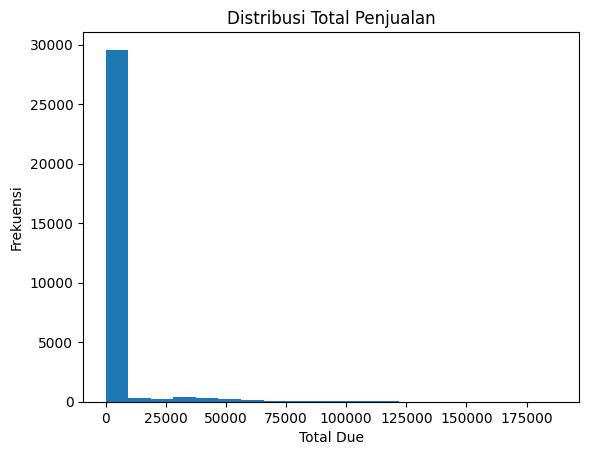

In [20]:
plt.hist(df['TotalDue'], bins=20)
plt.title('Distribusi Total Penjualan')
plt.xlabel('Total Due')
plt.ylabel('Frekuensi')
plt.show()

# Time Series

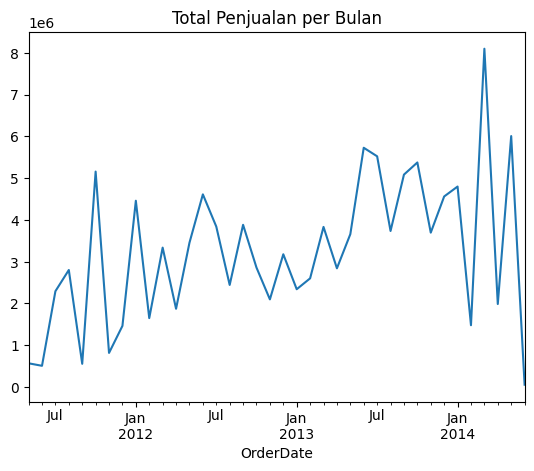

In [26]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)
df['TotalDue'].resample('M').sum().plot()
plt.title('Total Penjualan per Bulan')
plt.show()

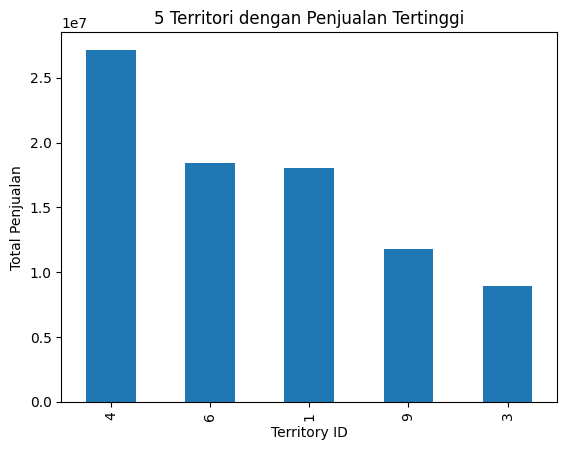

In [29]:
territory_sales = df.groupby('TerritoryID')['TotalDue'].sum().sort_values(ascending=False)
top_5_territories = territory_sales.head()
top_5_territories.plot(kind='bar')
plt.title('5 Territori dengan Penjualan Tertinggi')
plt.xlabel('Territory ID')
plt.ylabel('Total Penjualan')
plt.show()

# Scatter Plot

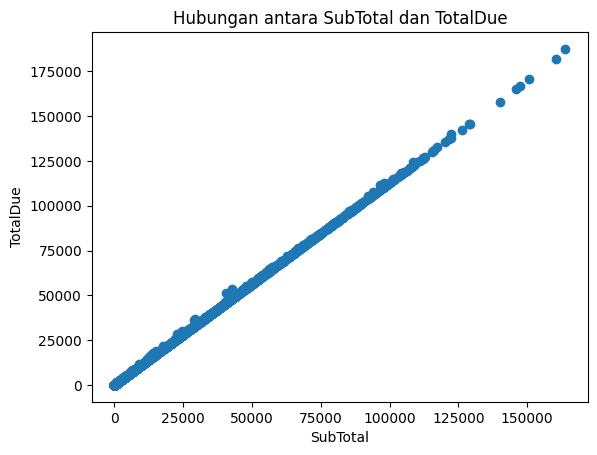

In [30]:
plt.scatter(df['SubTotal'], df['TotalDue'])
plt.title('Hubungan antara SubTotal dan TotalDue')
plt.xlabel('SubTotal')
plt.ylabel('TotalDue')
plt.show()

# Pair Plot

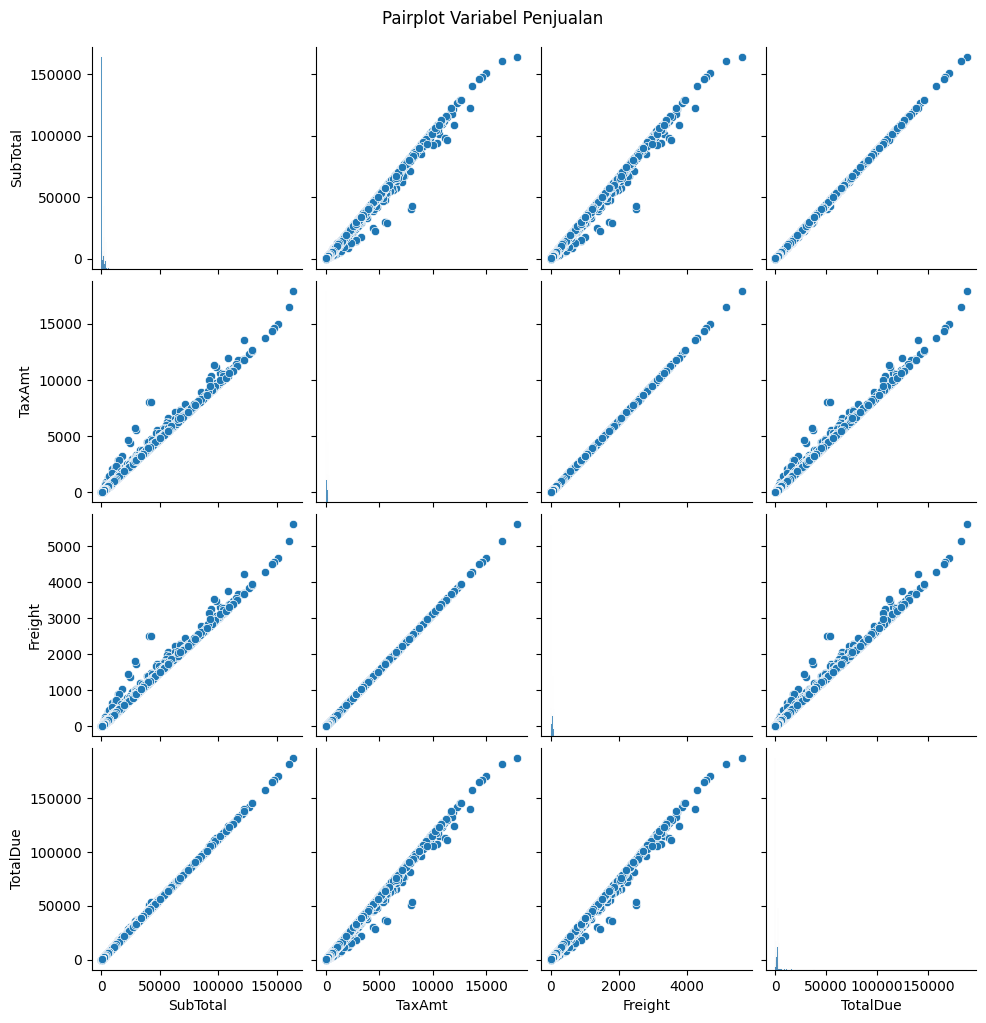

In [31]:
import seaborn as sns

sns.pairplot(df[['SubTotal', 'TaxAmt', 'Freight', 'TotalDue']])
plt.suptitle('Pairplot Variabel Penjualan', y=1.02)
plt.show()

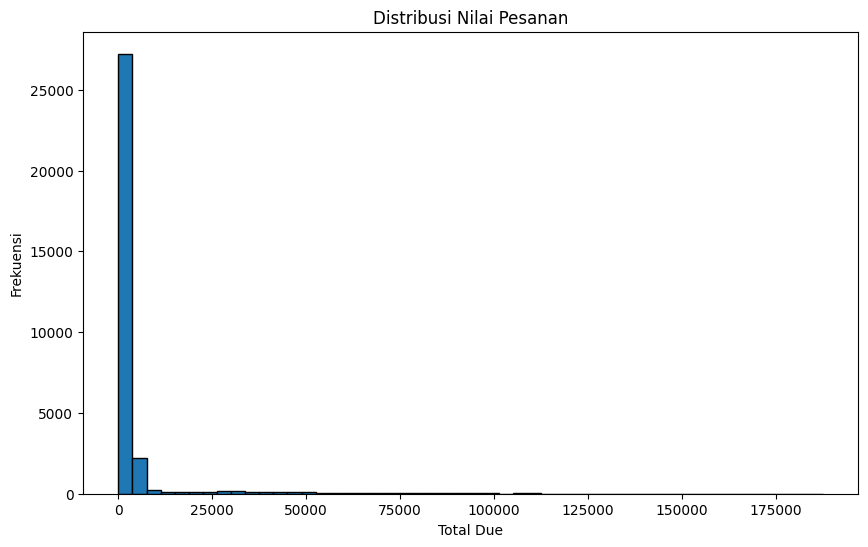

In [34]:
plt.figure(figsize=(10,6))
plt.hist(df['TotalDue'], bins=50, edgecolor='black')
plt.title('Distribusi Nilai Pesanan')
plt.xlabel('Total Due')
plt.ylabel('Frekuensi')
plt.show()

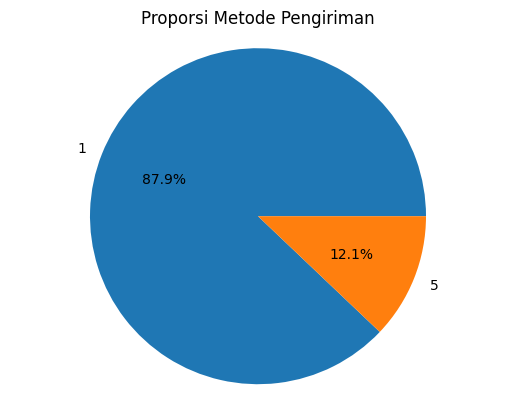

In [35]:
ship_methods = df['ShipMethodID'].value_counts()
plt.pie(ship_methods, labels=ship_methods.index, autopct='%1.1f%%')
plt.title('Proporsi Metode Pengiriman')
plt.axis('equal')
plt.show()

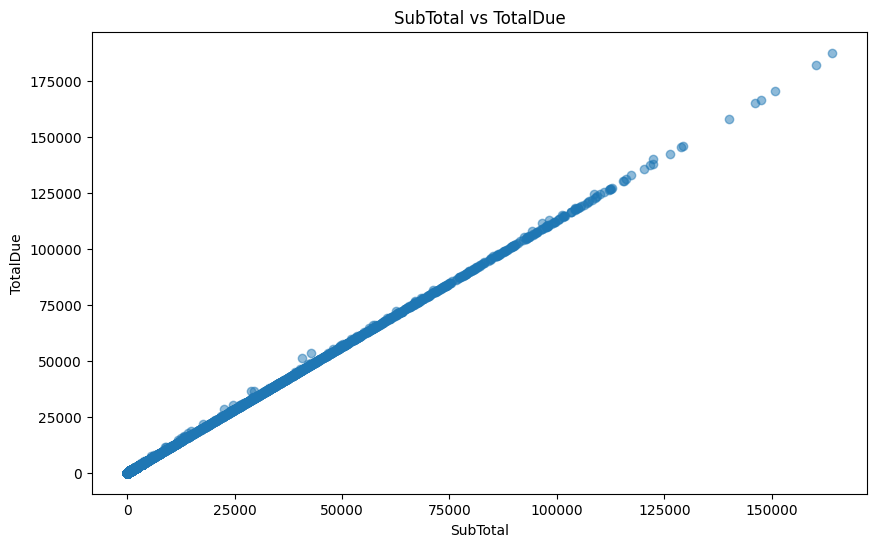

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df['SubTotal'], df['TotalDue'], alpha=0.5)
plt.title('SubTotal vs TotalDue')
plt.xlabel('SubTotal')
plt.ylabel('TotalDue')
plt.show()

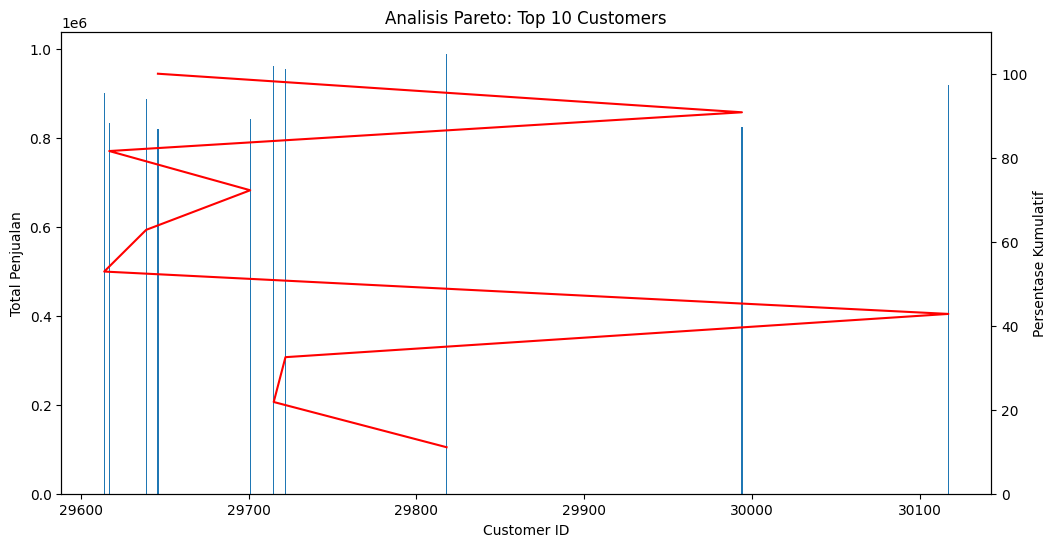

In [39]:
top_customers = df.groupby('CustomerID')['TotalDue'].sum().sort_values(ascending=False).head(10)
cumulative_pct = top_customers.cumsum() / top_customers.sum() * 100

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(top_customers.index, top_customers.values)
ax2 = ax1.twinx()
ax2.plot(top_customers.index, cumulative_pct, 'r-')
ax2.set_ylim([0, 110])
ax1.set_xlabel('Customer ID')
ax1.set_ylabel('Total Penjualan')
ax2.set_ylabel('Persentase Kumulatif')
plt.title('Analisis Pareto: Top 10 Customers')
plt.show()

In [42]:
import numpy as np

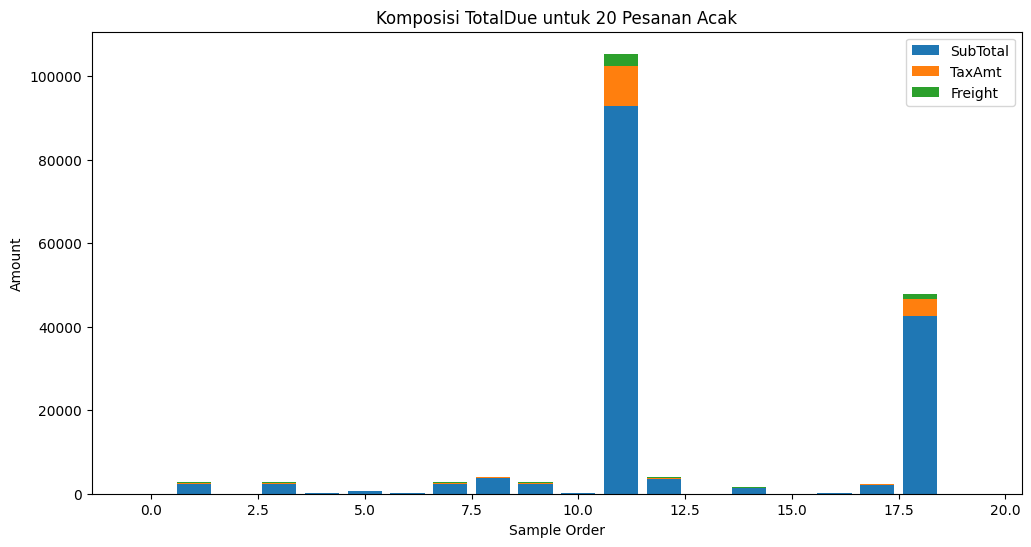

In [43]:
import numpy as np

df_sample = df.sample(20)  # Ambil 20 sampel acak
components = ['SubTotal', 'TaxAmt', 'Freight']

plt.figure(figsize=(12,6))
bottom = np.zeros(20)

for component in components:
    plt.bar(range(20), df_sample[component], bottom=bottom, label=component)
    bottom += df_sample[component]

plt.title('Komposisi TotalDue untuk 20 Pesanan Acak')
plt.legend()
plt.xlabel('Sample Order')
plt.ylabel('Amount')
plt.show()

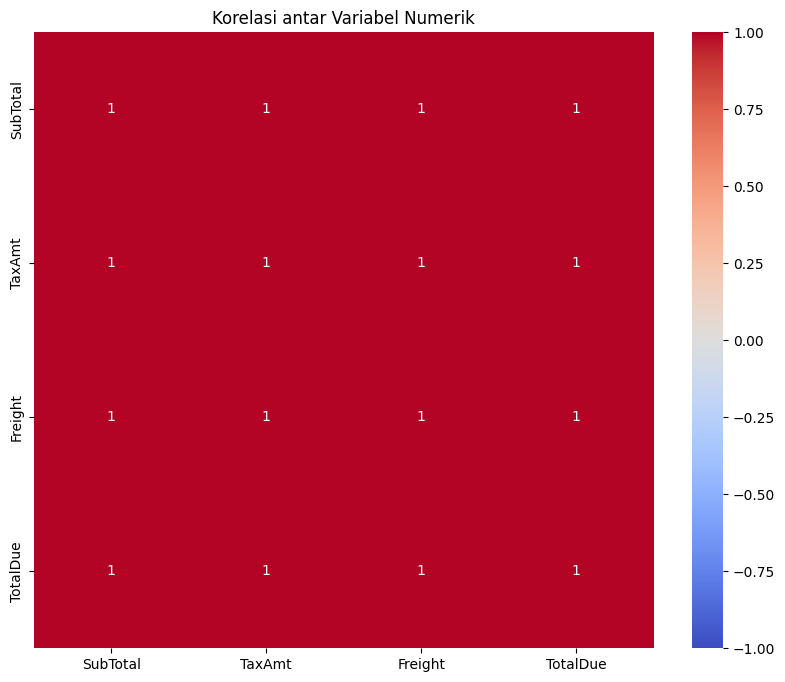

In [44]:
numeric_columns = ['SubTotal', 'TaxAmt', 'Freight', 'TotalDue']
correlation = df[numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Korelasi antar Variabel Numerik')
plt.show()

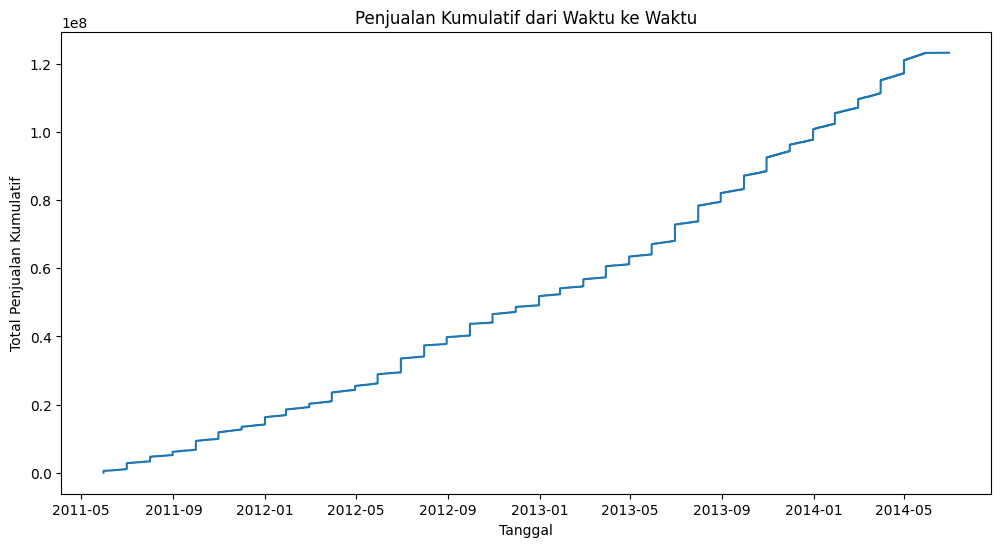

: 

In [45]:
df_sorted = df.sort_index()
df_sorted['Cumulative_Sales'] = df_sorted['TotalDue'].cumsum()

plt.figure(figsize=(12,6))
plt.plot(df_sorted.index, df_sorted['Cumulative_Sales'])
plt.title('Penjualan Kumulatif dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan Kumulatif')
plt.show()